<h1>1: Exploring the Rising Rate of Attrition in a Changing Work Landscape</h1>

<h2>Introduction:</h2>
In today's rapidly evolving work environment, companies around the world are facing new challenges driven by shifting work cultures and the emergence of tech-savvy generations. Terms like millennials, Gen Z, and Gen Alpha are commonly used to describe these generations, each characterized by their unique perspectives and relationship with technology. As a result, the rate of attrition has been on the rise, particularly within the Gen Z demographic, as the global economy undergoes significant transformations. Gone are the days when individuals like Homer Simpson could effortlessly juggle homeownership, raising three children, and a functioning yet unconventional lifestyle without a college education.

Exceptional cases like Mark Zuckerberg and Steve Jobs, who dropped out of college and achieved immense success, represent a minute fraction of individuals. In today's economic landscape, marked by rising inflation and technological advancements, the notion of a secure, long-term, pensionable job is gradually fading away. This trend aligns with the mindset of Gen Z, who are increasingly drawn to alternative work arrangements and are less inclined towards traditional full-time employment.

<h2>Objectives:</h2>
In this notebook, we aim to delve into the reasons behind the high rate of attrition in organizations, considering a multitude of factors such as changes in business models, the concept of "silent quitting," or a decline in company prospects. Our analysis will focus on finding answers to the following questions:

   * What is the gender, job role, and age distribution of the company's workforce?
   * Which department within the company experienced the highest percentage of attrition?
   * What factors contribute to the rate of attrition based on the available data?
    *How accurate is our model in predicting and understanding attrition patterns?

By exploring these aspects, we seek to gain valuable insights into the factors driving attrition and equip organizations with knowledge to address this issue effectively. Let's embark on this journey of exploration and analysis to better understand the evolving dynamics of the modern workplace.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


%matplotlib inline


In [33]:
hr_data = pd.read_csv("HR-Employee-Attrition.csv")
#Checking for null values in the data.
hr_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<h1> 2. Distribution of employees based on Job roles, age and gender. </h1>

<h2>i) Distribution of Employees Based on Job Roles</h2>

After importing the necessary libraries, we'll load the HR employee attrition dataset using pandas and display the first five rows. We'll examine the distribution of employees working in the company based on their job roles. To do this, we'll count the occurrences of each job role and display the number of unique job roles. To do so:

* We use the value_counts() function to determine the number of employees in each of the job roles and print the shape to determine the dynamic of the company.
* We create a new variable **job_order** using the index fucntion to create a list of all the job roles from the most to the highest which will be used as input to arrange the employees in order from most to least depending on their job function.
* Finally, we loop through the **job_counts** numeric data and determine the percentage of workers in each job role as a percentage of the total workforce. The resulting graph visualizes the final data and helps us better understand the company.

In [2]:
hr_data = pd.read_csv("HR-Employee-Attrition.csv")
hr_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
#Distribution of the employees working in the company based on job roles

job_counts = hr_data['JobRole'].value_counts()
job_order = job_counts.index
print(job_counts.shape[0])

9


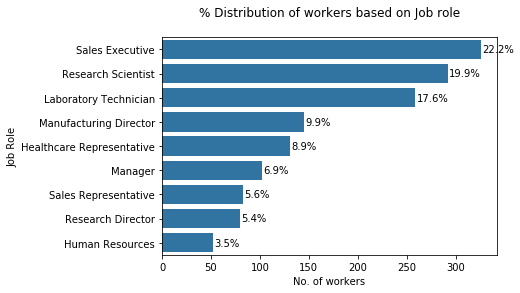

In [4]:
base_color = sb.color_palette()[0]
n_workers = hr_data.shape[0]

sb.countplot(data = hr_data, y= 'JobRole', color = base_color,
            order = job_order);

plt.xlabel('No. of workers')
plt.ylabel('Job Role')
plt.title('% Distribution of workers based on Job role\n')

for i in range(job_counts.shape[0]):
    count = job_counts[i]
    pct_string = '{:0.1f}%'.format((count/n_workers)*100)
    plt.text(count+1, i, pct_string, va='center');

<h2> ii) Distribution in terms of age </h2>

We'll analyze the age distribution of all workers in the company by creating a histogram. The code above calculates the count of employees for each age, defines the bin range for the histogram, and plots the histogram using the plt.hist() function. The resulting histogram shows the distribution of employees across different age groups. The bins are a subjective criteria and can be adjusted to suit your individual visualization needs. For this experiment, I decided to work with a 2 which was visually more appealing.

Feel free to customize the code or add additional analysis as needed.

**Results:** Based from the data, 35 was the largest age group with 78 people.

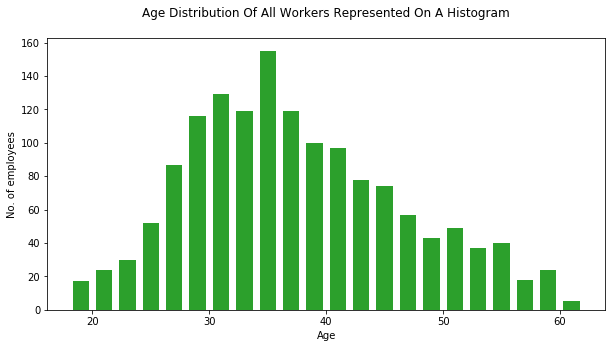

In [52]:
age_count = hr_data['Age'].value_counts()
age_order = hr_data.index
base_color = sb.color_palette()[2]

bins = np.arange(18, hr_data['Age'].max()+4, 2)
plt.figure(figsize=[10, 5])
#plt.subplot(1, 2, 1)

plt.title("Age Distribution Of All Workers Represented On A Histogram\n")
plt.xlabel("Age")
plt.ylabel("No. of employees")

plt.hist(data = hr_data, x = 'Age', color = base_color, bins = bins, rwidth=0.7);

In [7]:
print("Based from the above data,",age_count.index[0], "was the largest"\
" age group with", age_count.max(), "people.")

Based from the above data, 35 was the largest age group with 78 people.


<h2>iii) Distribution of binary gender on a pie chart</h2>

To visualize the distribution of binary gender in the company, we'll create a pie chart. The code below counts the occurrences of each gender, defines a custom **autopct** function to display the percentage and count values on the pie chart, and plots the pie chart using the **plt.pie()** function. The resulting pie chart visualizes the distribution of male and female employees in the company.

In [8]:
gender_count = hr_data['Gender'].value_counts()
gender_count

Male      882
Female    588
Name: Gender, dtype: int64

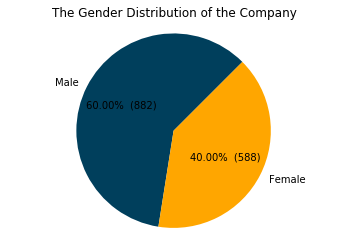

In [50]:
gender_count = hr_data['Gender'].value_counts()

value = gender_count.value_counts().index


def text(value):
    def my_autopct(pct):
        total = np.sum(value)
        val = int(round(pct*float(total)/100.0))
        return f'{pct:.2f}%  ({val:d})'
    return my_autopct
    
fig, ax = plt.subplots()
_ = ax.pie([gender_count['Male'], gender_count['Female']], labels=['Male', 'Female'],
           autopct=text(value), colors = ['#003f5c', '#ffa600'], 
           startangle = 45)
_ = ax.axis('equal')
_ = ax.set_title('The Gender Distribution of the Company')



<h1>3. Department Within the Company That Experienced the Most Attrition. </h1>

Some of factors we want to consider in this section: 
* First, we need to determine if every department was affected by attrition or whether it was isolated to specific departments and job roles.
* The number of employees that attrited as part of all employees working within that department were.

<h2>Though process:</h2>
To achieve this, we need to make modifications to the original data and exclude the columns that will not be necessary for the next steps. To accomplush this, new variables were defined:

* **attrn_data** - using pandas **melt** function, a data frame was created with the columns for Gender, Department and Job role as **id_vars** and Attrition as the **value_vars**  
* **modified** - to make it easier to work with the data, we create this fucntion that itterates through the attrition column converting the 'Yes' values to 1 and 'No' to 0 to demostrate the workers that attrited.
* **let_go** - a data frame that meets the condition attrition == 1
* **stay** - a data frame that meets the condition attrition == 0

**Results** - In total, 237 employees were attritioned. Of these, employees released from each job role were:
* Laboratory Technician: 62 out of 197
* Sales Executive: 57 out of 269
* Research Scientist: 47 out of 245
* Sales Representative: 33 out of 50
* Human Resources: 12 out of 40
* Manufacturing Director: 10 out of 135
* Healthcare Representative: 9 out of 122
* Manager: 5 out of 97
* Research Director: 2 out of 78

In [10]:
# Melt the DataFrame to reshape it
attrn_data = pd.read_csv('HR-Employee-Attrition.csv')

attrn = attrn_data.melt(id_vars =['Gender', 'Department', 'JobRole'],
                     value_vars = ['Attrition'],
                     var_name = 'Let_go', value_name = 'Yes/No')
attrn.head(10)


,Gender,Department,JobRole,Let_go,Yes/No
0,Female,Sales,Sales Executive,Attrition,Yes
1,Male,Research & Development,Research Scientist,Attrition,No
2,Male,Research & Development,Laboratory Technician,Attrition,Yes
3,Female,Research & Development,Research Scientist,Attrition,No
4,Male,Research & Development,Laboratory Technician,Attrition,No
5,Male,Research & Development,Laboratory Technician,Attrition,No
6,Female,Research & Development,Laboratory Technician,Attrition,No
7,Male,Research & Development,Laboratory Technician,Attrition,No
8,Male,Research & Development,Manufacturing Director,Attrition,No
9,Male,Research & Development,Healthcare Representative,Attrition,No


In [11]:
# Create a modified column with binary values (0 for 'No', 1 for 'Yes')
modified = [0 if x == "No" else 1 for x in attrn['Yes/No']]

# Create a copy of the DataFrame and replace the 'Yes/No' column with the modified values
outpt = attrn.copy()
outpt['Yes/No'] = modified
outpt.head(10)

,Gender,Department,JobRole,Let_go,Yes/No
0,Female,Sales,Sales Executive,Attrition,1
1,Male,Research & Development,Research Scientist,Attrition,0
2,Male,Research & Development,Laboratory Technician,Attrition,1
3,Female,Research & Development,Research Scientist,Attrition,0
4,Male,Research & Development,Laboratory Technician,Attrition,0
5,Male,Research & Development,Laboratory Technician,Attrition,0
6,Female,Research & Development,Laboratory Technician,Attrition,0
7,Male,Research & Development,Laboratory Technician,Attrition,0
8,Male,Research & Development,Manufacturing Director,Attrition,0
9,Male,Research & Development,Healthcare Representative,Attrition,0


In [12]:
condition = outpt['Yes/No'] == 1
condition1 = outpt['Yes/No'] == 0

# Filter the DataFrame to get rows where 'Yes/No' column is 1 (indicating attrition)
let_go = outpt[condition]
let_go

,Gender,Department,JobRole,Let_go,Yes/No
0,Female,Sales,Sales Executive,Attrition,1
2,Male,Research & Development,Laboratory Technician,Attrition,1
14,Male,Research & Development,Laboratory Technician,Attrition,1
21,Male,Sales,Sales Representative,Attrition,1
24,Male,Research & Development,Research Scientist,Attrition,1
...,...,...,...,...,...
1438,Male,Sales,Sales Representative,Attrition,1
1442,Male,Research & Development,Research Scientist,Attrition,1
1444,Male,Research & Development,Laboratory Technician,Attrition,1
1452,Male,Sales,Sales Executive,Attrition,1


In [51]:
stay = outpt[condition1]
job_role = [x for x in let_go['JobRole']]
j_role = []

for x in job_role:
    if x not in j_role:
        j_role.append(x)
        
#total = {j_role[0]: let_go['Department']}
total = dict()

# Calculate the count of 'Yes' and 'No' values in the 'Department' column for attritioned and retained employees
for y in j_role:
    yes = (let_go['JobRole']==y).value_counts()
    no = (stay['JobRole']==y).value_counts()
    total[y] = [yes[1], no[1]]


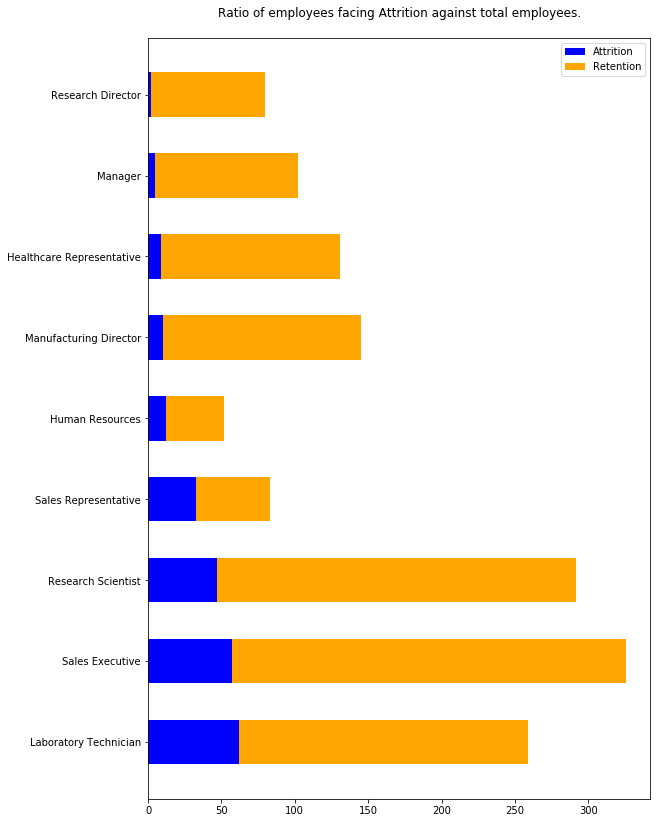

In [41]:
a = []
b = []
figures = []

#Fig Size
fig, ax = plt.subplots(figsize = (9, 14))

sorted_total = dict(sorted(total.items(), key = lambda x:x[1], reverse=True ))

for key in sorted_total:
    a.append(total[key][0])
    b.append(total[key][1])
    figures.append(key)
    width = 0.55

plt.barh(figures, a, width, color = 'blue')
plt.barh(figures, b, width, left = a, color = 'orange')

ax.set_title('Ratio of employees facing Attrition against total employees.\n')
plt.legend(('Attrition', 'Retention'))

plt.show()

In [18]:
hr_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


<h1> 4) Checking for Outliers in the HR DataFrame </h1>

To ensure data quality, checking for outliers is essential so as to identify anomalous observations, assessing the impact on statistical analysis and informing data preprocessing and transformation. 

In the code below, a list **inordinate** is defined to store the names of ordinal columns. The non-ordinal columns from the HR DataFrame are selected and stored in the **hr_df** DataFrame. The **outlier_check()** function is then defined to calculate and print the count and percentage of outliers for each column in **hr_df**. Finally, the **outlier_check()** function is called to perform the outlier check.

The **inordinate_df** DataFrame is created by selecting the **inordinate** columns from the HR DataFrame and dropping the 'StandardHours' and 'EmployeeCount' columns. Then, a correlation matrix (corr_mtrx) is calculated by concatenating the ordinate and inordinate DataFrames and using the Spearman correlation method. Finally, a heatmap of the correlation matrix is created using sb.heatmap()

**Results**:
There are three variables that had the strongest correlations:
 1. Monthly incomes, Job level and Total Working years
 2. Year at company, years with current manager, years in current role
 3. Job level and total working years

In [53]:
inordinate = ['Education','EnvironmentSatisfaction',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'PerformanceRating', 'StandardHours', 'EmployeeCount',
        'RelationshipSatisfaction', 'StockOptionLevel', 
        'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance']

# Create a new DataFrame containing non-ordinal columns from the HR DataFrame
hr_df = hr_data[hr].reset_index(drop = True).drop(inordinate, axis=1)
hr_df.describe()

,Age,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,1024.865306,65.891156,6502.931293,14313.103401,2.693197,15.209524,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,602.024335,20.329428,4707.956783,7117.786044,2.498009,3.659938,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,30.000000,1009.000000,2094.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,491.250000,48.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,1020.500000,66.000000,4919.000000,14235.500000,2.000000,14.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,1555.750000,83.750000,8379.000000,20461.500000,4.000000,18.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,2068.000000,100.000000,19999.000000,26999.000000,9.000000,25.000000,40.000000,18.000000,15.000000,17.000000


In [45]:
def outlier_check(data):
    print('Count of outliers:')
    outlier_tot = 0
    for value in data.columns:
        q1,q3 = np.percentile(data[value].sort_values(), [25, 75])
        quot = q3 - q1
        min_ = q1 - (1.5*quot)
        max_ = q3 + (1.5*quot)
        
        outlier = data[value].apply(lambda x: 1 if (x < min_ or x > max_)else 0)
        count = outlier[outlier==1].sum()
        if count > 0:
            outlier_tot = outlier_tot+1
        print(f' {value} --Count: {count} Percantage: {int(round(count/data.shape[0]*100, 0))}%')
        
    print(f'Total numner of variables with outliers: {outlier_tot}')
    
outlier_check(hr_df)


Count of outliers:
 Age --Count: 0 Percantage: 0%
 DailyRate --Count: 0 Percantage: 0%
 DistanceFromHome --Count: 0 Percantage: 0%
 EmployeeNumber --Count: 0 Percantage: 0%
 HourlyRate --Count: 0 Percantage: 0%
 MonthlyIncome --Count: 114 Percantage: 8%
 MonthlyRate --Count: 0 Percantage: 0%
 NumCompaniesWorked --Count: 52 Percantage: 4%
 PercentSalaryHike --Count: 0 Percantage: 0%
 YearsAtCompany --Count: 104 Percantage: 7%
 YearsInCurrentRole --Count: 21 Percantage: 1%
 YearsSinceLastPromotion --Count: 107 Percantage: 7%
 YearsWithCurrManager --Count: 14 Percantage: 1%
Total numner of variables with outliers: 6


In [48]:
inordinate_df = hr_data[inordinate]
cols = ['StandardHours', 'EmployeeCount']

inordinate_df = inordinate_df.drop(cols, axis=1)

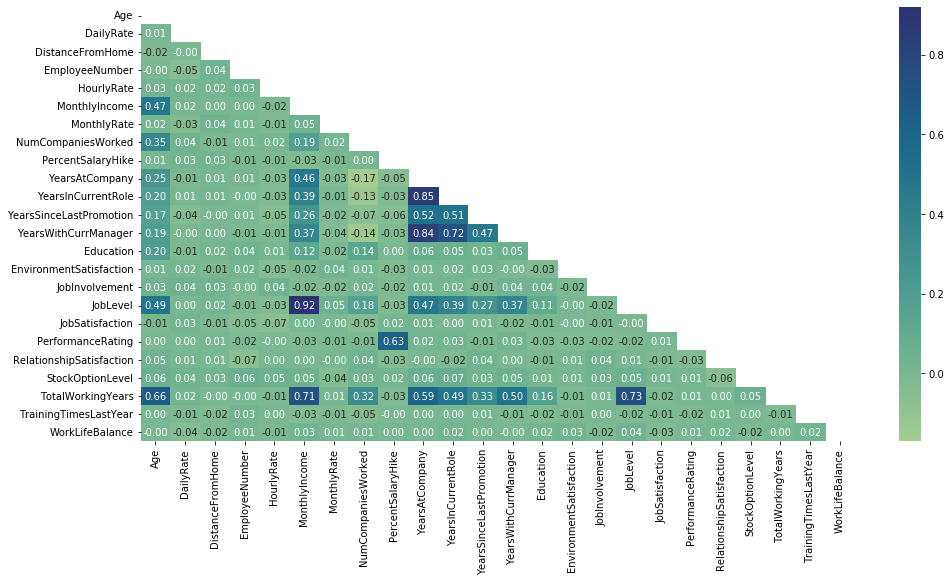

In [49]:
plt.figure(figsize=(16, 8))

# Concatenate the ordinate and inordinate DataFrames and calculate the Spearman correlation
corr_mtrx = pd.concat([hr_df, inordinate_df], axis=1).corr(method = 'spearman')
mask = np.triu(corr_mtrx)
sb.heatmap(corr_mtrx, annot=True, mask = mask, fmt ='.2f', cmap = 'crest')
plt.show()

<h1> 5) Classification Using K-Nearest Neighbors (KNN) </h1>

In the code above, a copy of the HR DataFrame is created and the 'Attrition' column is replaced with the modified 'Yes/No' column from outpt. The columns dictionary is used to identify columns with non-numeric values. These columns are then dropped from the data DataFrame. The data is split into training and testing sets using train_test_split(). A KNN classifier is initialized with n_neighbors=5 and fitted to the training data. Finally, the accuracy score of the model is calculated and printed.

An array neighbors is created to store the range of numbers of neighbors. Empty dictionaries **train_accuracies** and **test_accuracies** are initialized to store the training and testing accuracies for each number of neighbors.

The code then iterates over different numbers of neighbors, initializes a KNN classifier with the current number of neighbors, fits the classifier to the training data, and calculates the training and testing accuracies. The results for each number of neighbors are printed.

Finally, a plot is created to visualize the relationship between the number of neighbors and the training and testing accuracies.

In [56]:
data = hr_data.copy()
data['Attrition'] = outpt['Yes/No']

columns = dict()

# Identify columns with non-numeric values
for x in data:
    for y in data[x]:
        z = str(y)
        if z.isalpha() or ('_') in z or ('-') in z:
            columns[x] = 1
        
columns_to_drop = [x for x in columns]

# Drop non-numeric columns from the data DataFrame
data = data.drop(columns = columns_to_drop, axis =1)

X = data.drop('Attrition', axis=1).values

y = data['Attrition'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    random_state = 43, stratify = y)

knn = KNeighborsClassifier(n_neighbors = 5)

# Fit the KNN model to the training data
knn.fit(X_train, y_train)

# Calculate the accuracy score of the model on the testing data
a_score = round(100*knn.score(X_test, y_test), 3)
print('Accuracy =', str(a_score), '%')

Accuracy = 82.653 %


In [25]:
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

# Iterate over different numbers of neighbors
for neighbor in neighbors:
    
    knn = KNeighborsClassifier(n_neighbors = neighbor)
    
    knn.fit(X_train, y_train)
    
    # Calculate and store the training and testing accuracies
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)
    
    print(neighbor,"\n", train_accuracies, "\n", test_accuracies)

1 
 {1: 1.0} 
 {1: 0.7517006802721088}
2 
 {1: 1.0, 2: 0.8741496598639455} 
 {1: 0.7517006802721088, 2: 0.8401360544217688}
3 
 {1: 1.0, 2: 0.8741496598639455, 3: 0.8698979591836735} 
 {1: 0.7517006802721088, 2: 0.8401360544217688, 3: 0.8197278911564626}
4 
 {1: 1.0, 2: 0.8741496598639455, 3: 0.8698979591836735, 4: 0.8503401360544217} 
 {1: 0.7517006802721088, 2: 0.8401360544217688, 3: 0.8197278911564626, 4: 0.8469387755102041}
5 
 {1: 1.0, 2: 0.8741496598639455, 3: 0.8698979591836735, 4: 0.8503401360544217, 5: 0.8528911564625851} 
 {1: 0.7517006802721088, 2: 0.8401360544217688, 3: 0.8197278911564626, 4: 0.8469387755102041, 5: 0.826530612244898}
6 
 {1: 1.0, 2: 0.8741496598639455, 3: 0.8698979591836735, 4: 0.8503401360544217, 5: 0.8528911564625851, 6: 0.8460884353741497} 
 {1: 0.7517006802721088, 2: 0.8401360544217688, 3: 0.8197278911564626, 4: 0.8469387755102041, 5: 0.826530612244898, 6: 0.8469387755102041}
7 
 {1: 1.0, 2: 0.8741496598639455, 3: 0.8698979591836735, 4: 0.85034013605442

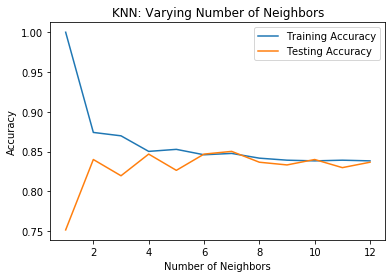

In [26]:
plt.title("KNN: Varying Number of Neighbors")

plt.plot(neighbors, list(train_accuracies.values()), label='Training Accuracy')

plt.plot(neighbors, list(test_accuracies.values()), label='Testing Accuracy')

plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel("Accuracy")

plt.show()